In [60]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/zad1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

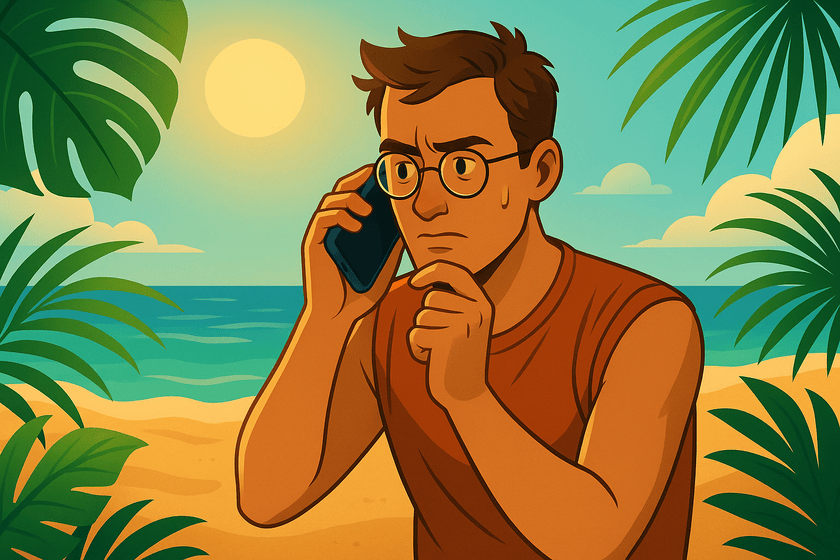

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [62]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
# numer biletu i imie nazwisko są nieważne

titanic_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
#numer biletu i imiona i nazwiska są nieważne
titanic_df.drop('Name' , axis='columns', inplace=True)
titanic_df.drop('Ticket' , axis='columns', inplace=True)




In [64]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [65]:
#brakujace wartości
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]




In [66]:
#chce poznać nazwy nagłowków tabeli
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [67]:
print(get_percentage_missing(titanic_df, 0))

Age         19.87
Fare        11.00
Cabin       77.10
Embarked     0.22
dtype: float64


In [68]:
titanic_df.loc[1:100]
#nie ma większości numerów cabin więc ta kolumna jest bezużyteczna
titanic_df.drop('Cabin' , axis='columns', inplace=True)


In [69]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [70]:
#uzupełnianie brakujących wartości

#Age
age_count_prob = get_column_distribution(titanic_df, 'Age')
#age_prob # index - number of children, column - probability of occurrence
age_values = age_count_prob.index
age_probs = age_count_prob.values
missing_age_vals = titanic_df.Age.isna()
titanic_df.loc[missing_age_vals, 'Age'] = np.random.choice(age_values, size=missing_age_vals.sum(), p=age_probs)



#Fare
fare_count_prob = get_column_distribution(titanic_df, 'Fare')
fare_values = fare_count_prob.index
fare_probs = fare_count_prob.values
missing_fare_vals = titanic_df.Fare.isna()
titanic_df.loc[missing_fare_vals, 'Fare'] = np.random.choice(fare_values, size=missing_fare_vals.sum(), p=fare_probs)

#Embarked
embarked_count_prob = get_column_distribution(titanic_df, 'Embarked')
embarked_values = embarked_count_prob.index
embarked_probs = embarked_count_prob.values
missing_embarked_vals = titanic_df.Embarked.isna()
titanic_df.loc[missing_embarked_vals, 'Embarked'] = np.random.choice(embarked_values, size=missing_embarked_vals.sum(), p=embarked_probs)


print(get_percentage_missing(titanic_df, 0))

Series([], dtype: float64)


In [71]:
#sprawdzanie typu danych
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [72]:
# pclass, survived trzeba zamienić na obiekt
# age trzeba zamienić na int
titanic_df = titanic_df.astype({'Pclass': 'object', 'Survived' : 'object', 'Age' : 'int32'})

titanic_df.dtypes

,0
Survived,object
Pclass,object
Sex,object
Age,int32
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [73]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

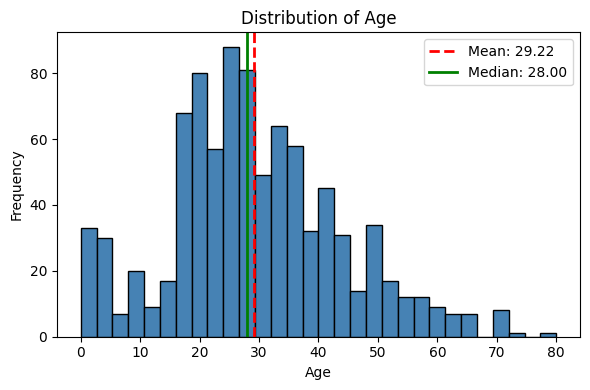

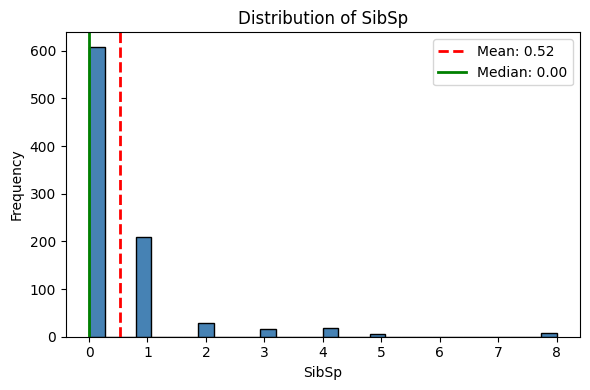

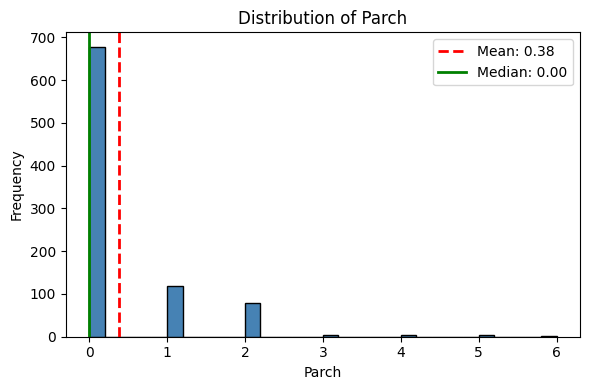

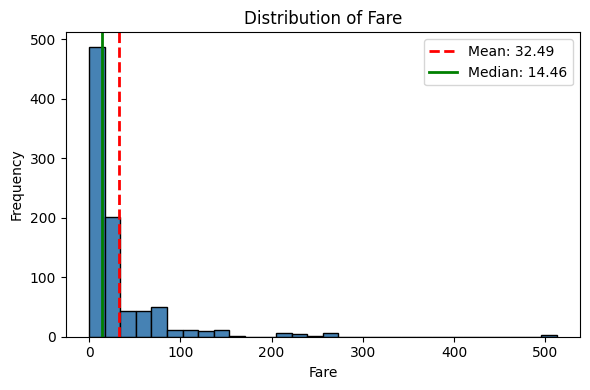

In [74]:
# plot_numeric_histogram(titanic_df, 1)
#rozkłady

for i in titanic_df.columns:
  if titanic_df[i].dtype == 'int64' or titanic_df[i].dtype == 'float64' or titanic_df[i].dtype == 'int32':
    plot_numeric_histogram(titanic_df, i)

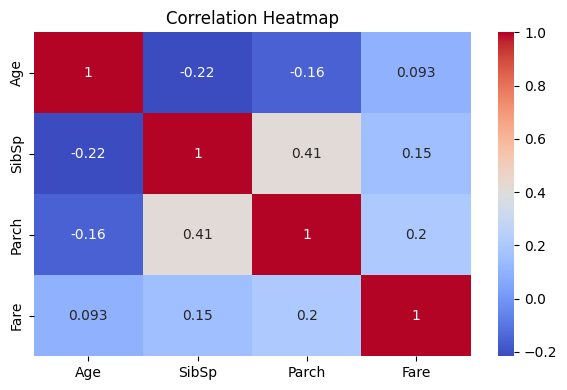

In [75]:
#heatmapa

# calculate correlation matrix
corr_matrix = titanic_df.corr(numeric_only=True) # numeric only, non numeric data is ignored

# annot=True let us see the numbers on the plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [76]:
#encoding
titanic_df[1:100]

#sex
titanic_df['Sex'] = titanic_df.Sex.map({
    'female': 1, 'male': 0
})
titanic_df[1:100]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
2,1,1,1,38,1,0,71.2833,C
3,1,3,1,26,0,0,7.9250,S
4,1,1,1,35,1,0,53.1000,S
5,0,3,0,35,0,0,8.0500,S
6,0,3,0,25,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
96,0,3,0,29,0,0,25.9292,S
97,0,1,0,71,0,0,34.6542,C
98,1,1,0,23,0,1,63.3583,C


In [77]:
#Embarked
titanic_df['Embarked'] = titanic_df.Embarked.map({
    'C': 0, 'Q': 1, 'S': 2
})
titanic_df[1:100]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
2,1,1,1,38,1,0,71.2833,0
3,1,3,1,26,0,0,7.9250,2
4,1,1,1,35,1,0,53.1000,2
5,0,3,0,35,0,0,8.0500,2
6,0,3,0,25,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
96,0,3,0,29,0,0,25.9292,2
97,0,1,0,71,0,0,34.6542,0
98,1,1,0,23,0,1,63.3583,0
